Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

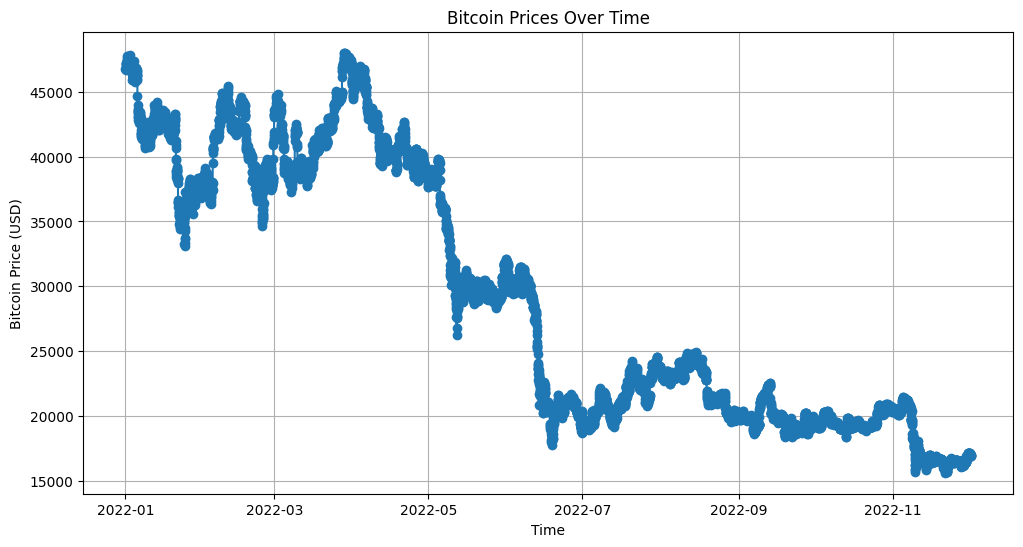

<Figure size 1200x600 with 0 Axes>

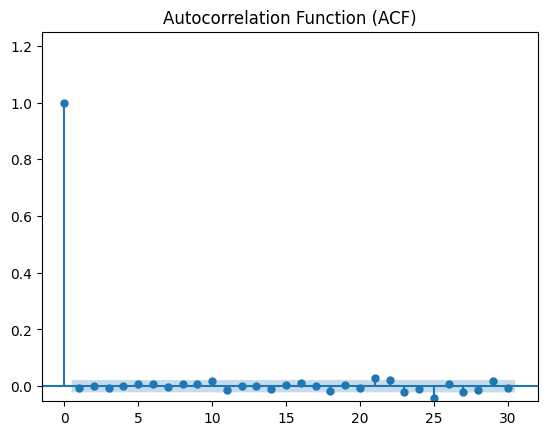

<Figure size 1200x600 with 0 Axes>

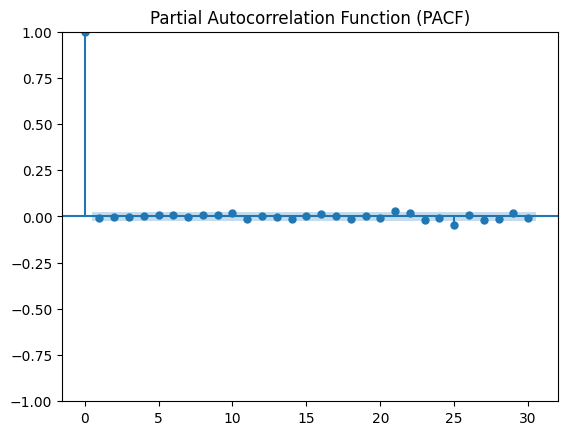

Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecast for the next 3 hour (USD):
[8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64]
[16923.77 16967.91 16980.08]

Model Evaluation:
hour 1:
MAE: 56.25 USD
RMSE: 56.25 USD
hour 2:
MAE: 12.11 USD
RMSE: 12.11 USD
hour 3:
MAE: 0.06 USD
RMSE: 0.06 USD


In [244]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn as sk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels import graphics

import matplotlib.mlab as mlab
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [245]:
url = "https://finance.yahoo.com/chart/BTC-USD?showOptin=1h#eyJpbnRlcnZhbCI6NjAsInBlcmlvZGljaXR5IjoxLCJ0aW1lVW5pdCI6Im1pbnV0ZSIsImNhbmRsZVdpZHRoIjozLjI0MTA5NTg5MDQxMDk1OSwiZmxpcHBlZCI6ZmFsc2UsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQlRDLVVTRCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsIuKAjHZvbCB1bmRy4oCMIl19fSwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJyYW5nZSI6e30sImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOm51bGwsInN5bWJvbHMiOlt7InN5bWJvbCI6IkJUQy1VU0QiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQlRDLVVTRCIsInF1b3RlVHlwZSI6IkNSWVBUT0NVUlJFTkNZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IlVUQyJ9LCJwZXJpb2RpY2l0eSI6MSwiaW50ZXJ2YWwiOjYwLCJ0aW1lVW5pdCI6Im1pbnV0ZSIsInNldFNwYW4iOnt9fV0sInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19fSwic2V0U3BhbiI6e319"

In [247]:
%config LoggingMagics.quiet=False

In [ ]:
symbol = 'BTCUSDT'
from_timestamp = int(datetime.datetime(year=2022,month=1,day=1).timestamp())
to_timestamp = int(datetime.datetime(2022,12,31).timestamp())

wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={from_timestamp}&to={to_timestamp}'

r= requests.get(wallex)
r

In [248]:
data = r.json()
df = pd.DataFrame({"timestamp":data['t'],"open":data['o'],"close":data['c'],"low":data['l'],"high":data['h']}
                  # ,dtype='float32'
                 )
df.to_csv('bitcoin_prices.csv')

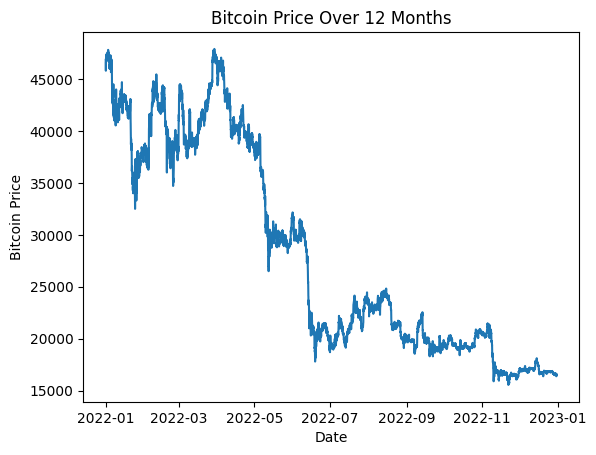

In [249]:

# Load the dataset
df = pd.read_csv('./bitcoin_prices.csv')

df['datetime'] = df['timestamp'].map(lambda x: datetime.datetime.fromtimestamp(x))
# Convert timestamp column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

df['mean_price'] = df.apply(lambda x: (x.open + x.close+x.low+x.high)/4,axis=1)
df['price'] = df.apply(lambda x: (x.close if x.open > x.close else x.open),axis=1)

# # Set timestamp column as index
df.set_index('datetime', inplace=True)

# Plot the time series of Bitcoin prices
plt.plot(df.index, df['price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Over 12 Months')

plt.show()

In [250]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
  
    if p_value < 0.05:
        return True 
    else:
        return False


df['diff'] = df['price'].diff()
df = df[1:]
# df

is_stationary = check_stationarity(df['diff'])
print("Is the differenced series stationary?", is_stationary)

Is the differenced series stationary? True


In [251]:
from statsmodels.tsa.arima.model import ARIMA
# Define values for p, d, and q
p = 3  # Order of autoregressive terms
d = 2 # Order of differencing
q = 3  # Order of moving average terms

# Fit the ARIMA model
model = ARIMA(df['price'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 8590
Model:                 ARIMA(3, 2, 3)   Log Likelihood              -60137.025
Date:                Sun, 08 Oct 2023   AIC                         120288.051
Time:                        01:47:30   BIC                         120337.458
Sample:                             0   HQIC                        120304.902
                               - 8590                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8161      0.027    -67.792      0.000      -1.869      -1.764
ar.L2         -1.1851      0.026    -44.920      0.000      -1.237      -1.133
ar.L3         -0.1587      0.007    -22.145      0.0

In [255]:
forecast = model_fit.forecast(steps=3)
forecast

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8590    16558.140594
8591    16563.070676
8592    16553.277209
Name: predicted_mean, dtype: float64

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

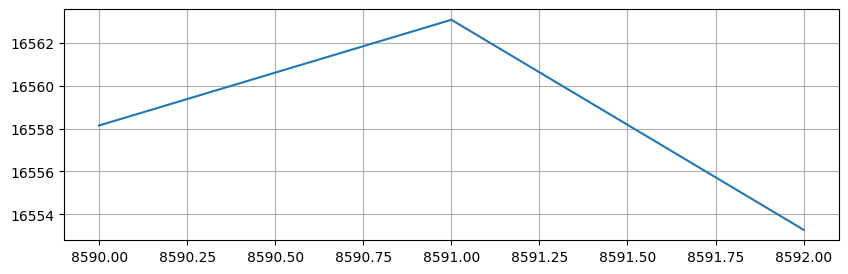

In [256]:
# Forecast the next 3 hours
forecast = model_fit.forecast(steps=3)
forecast.plot(figsize=(10,3),grid=True)


In [257]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

model = ARIMA(train_data['price'], order=(p, d, q))
model_fit = model.fit()


forecast = model_fit.forecast(steps=len(test_data))

mae = sk.metrics.mean_absolute_error(test_data['price'], forecast)
rmse = sk.metrics.mean_squared_error(test_data['price'], forecast, squared=False)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

Mean Absolute Error (MAE): 1649.369288696765
Root Mean Squared Error (RMSE): 2012.9695848284232


In [258]:
sk.metrics.v_measure_score(test_data['price'], forecast)

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9560415075995049

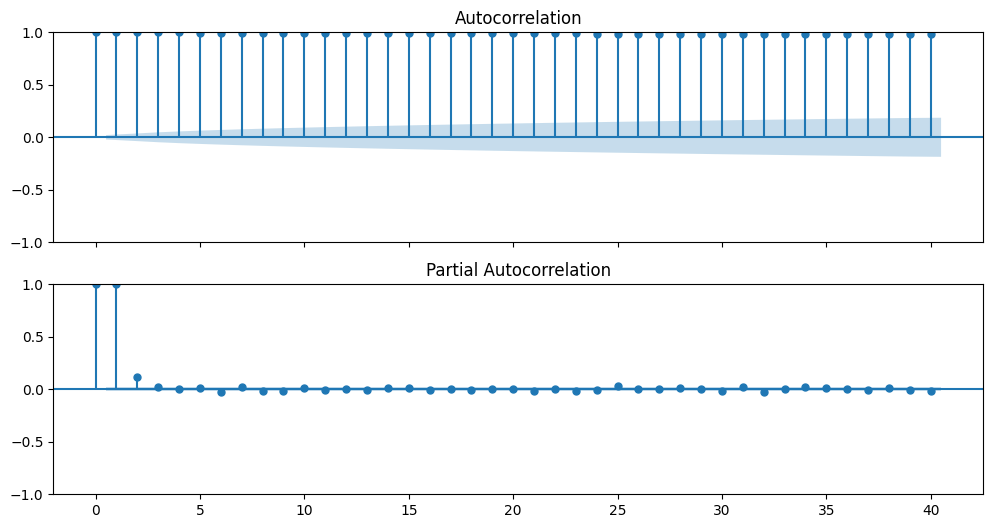

In [259]:
fig, ax = plt.subplots(2,1,figsize=(12, 6),sharex=True)
plot_acf(df.price, ax=ax[0])
plot_pacf(df.price, ax=ax[1])

plt.show()

# Other Soulution

In [260]:
variables = df
price = df['price']

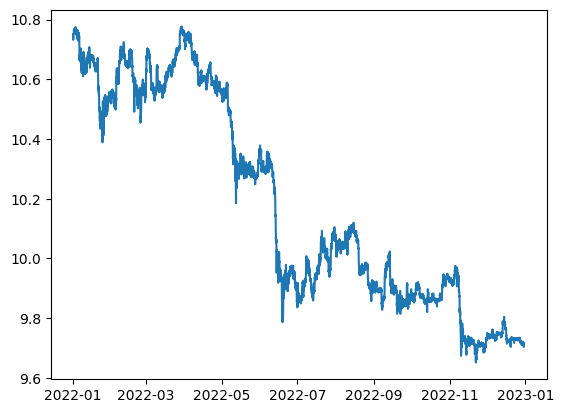

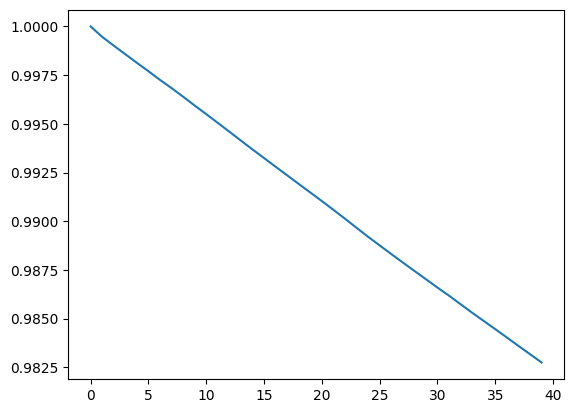

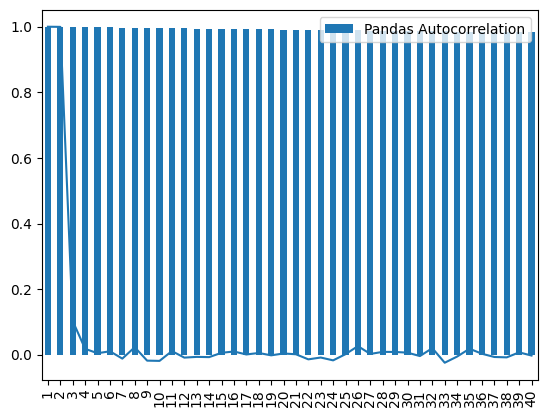

(-1.1599982198072059,
 0.6905625582056207,
 1,
 8588,
 {'1%': -3.431111673924639,
  '5%': -2.861876608471867,
  '10%': -2.5669491717610975},
 -57878.17140948857)

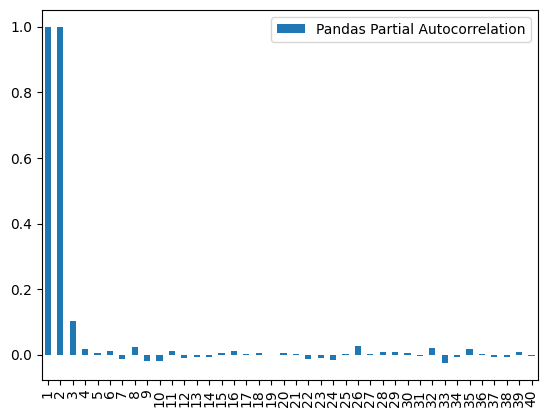

In [261]:
lnprice= np.log(price)
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice) #[1:20]
plt.plot(acf_1)
plt.show()
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice) #[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

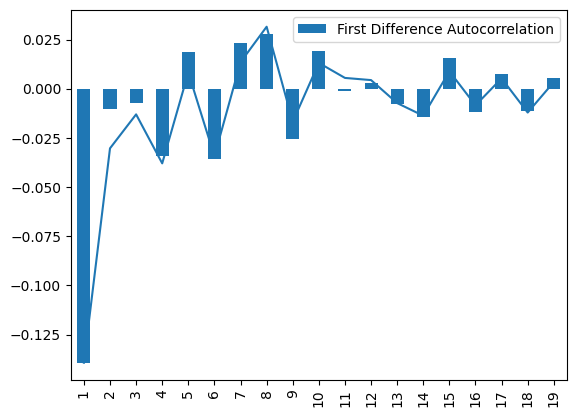

In [262]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [263]:
price_matrix=lnprice
model = ARIMA(price_matrix, order=(3,2,3))
model_fit = model.fit()
print(model_fit.summary())

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 8590
Model:                 ARIMA(3, 2, 3)   Log Likelihood               28938.821
Date:                Sun, 08 Oct 2023   AIC                         -57863.642
Time:                        01:48:12   BIC                         -57814.235
Sample:                             0   HQIC                        -57846.791
                               - 8590                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6491      0.037    -44.127      0.000      -1.722      -1.576
ar.L2         -1.0725      0.040    -27.071      0.000      -1.150      -0.995
ar.L3         -0.1040      0.009    -11.714      0.0

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [264]:
predictions=model_fit.predict(122, 127, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

datetime
2022-01-08 14:30:00    41634.124432
2022-01-08 15:30:00    41903.770375
2022-01-08 16:30:00    42148.794645
2022-01-08 19:30:00    41817.862117
2022-01-08 20:30:00    41737.616974
2022-01-08 21:30:00    41654.947574
Name: predicted_mean, dtype: float64